In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Bulbo

In [2]:
#Constants
G = 4.302e-6
q_b = 0.6
r_b = 1.9
a_b = 1.
alpha_b = 1.8
rho_b_II = 0.3e9

In [3]:
def I_b(x,R,q_b=0.6,alpha_b=1.8,r_b=1.9,a_b=a_b):
    e = np.sqrt(1. - q_b**2.)
    n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
    d = np.sqrt(1.-x**2.*e**2.)
    t = R**2.*(R/a_b)**(-alpha_b)
    return (t*n)/d

In [4]:
def Vc_ad_b(l):
    Integral_b = []
    for i in range (0,len(l)):
        result = integrate.quad(I_b,0,1,args=(l[i]))[0]
        Integral_b.append(result)
    return np.array(Integral_b)

In [5]:
R = np.linspace(0.1,15.,100)

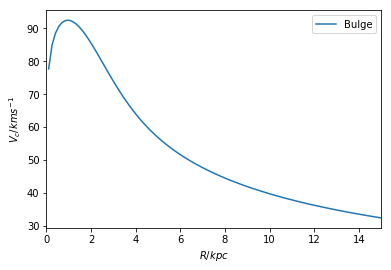

In [6]:
V_b = np.sqrt(4.*np.pi*G*q_b*rho_b_II*Vc_ad_b(R))
plt.plot(R,V_b,label='Bulge')
xlim(0.,15.)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

# DM Halo

In [7]:
#Constants
q_h = 0.8
a_h_II = 1.9
rho_h_II = 0.266e9
U_2 = G*rho_h_II*a_h_II**2.
C_DM = 4.*np.pi*q_h

In [8]:
def integral_DM(x,R,q_h=0.8,alpha_h=1.63,a_h=a_h_II,beta_h=2.17):
    e = np.sqrt(1.- q_h**2.)
    n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
    d = np.sqrt(1-x**2.*e**2)
    t = R**2.*(R/a_h)**(-alpha_h)
    result = (t*n)/d
    return result

In [9]:
def Vc2_DM(l):
    Integral_R = []
    for i in range (0,len(l)):
        result = integrate.quad(integral_DM,0,0.9,args=(l[i]))[0]
        Integral_R.append(result)
    return np.array(Integral_R)

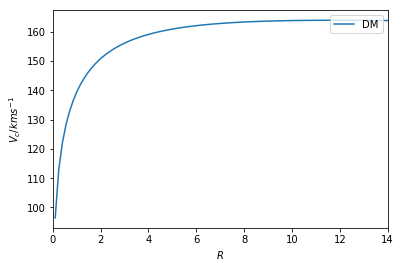

In [10]:
Vc_DM = np.sqrt(C_DM*G*rho_h_II*Vc2_DM(R))
plt.plot(R,Vc_DM,label='DM')
xlim(0.,14.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

# Stelar Disk

In [11]:
#Constants
R_d_II = 3.2
Sigma_d_II = (536.0e6)*0.75
C_SD = 2.*np.pi*G*Sigma_d_II*R_d_II

In [12]:
def Vc2_SD(R,R_d=R_d_II):
    result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
    return result

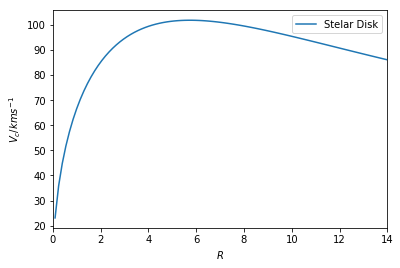

In [13]:
Vc_SD = np.sqrt(C_SD*Vc2_SD(R))
#plt.plot(R,np.sqrt(C_II*V2_c(R,R_d=R_d_II)),label='model II')
plt.plot(R,Vc_SD,label='Stelar Disk')
xlim(0.,14.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

# Interstelar Medium

In [14]:
#Cosntants
Sigma_g_ISM = (536.0e6)*0.25
C_ISM = 2.*np.pi*Sigma_g_ISM

In [15]:
def M_g_II(u,R,R_d=3.2,R_m=4.):
    return u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))

In [16]:
def V_c_g_ISM(l):
    Integral_M_g = []
    for i in range (0,len(l)):
        result = integrate.quad(M_g_II,0,1,args=(l[i]))[0]
        Integral_M_g.append(result)
    Integral = np.array(Integral_M_g)
    V = l*Integral
    return V

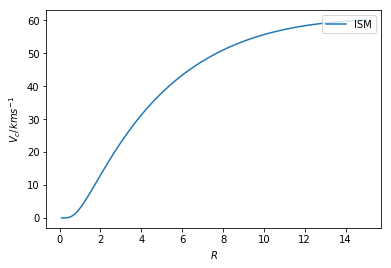

In [17]:
Vc_ISM = np.sqrt(G*C_ISM*V_c_g_ISM(R))
plt.plot(R,Vc_ISM,label='ISM')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

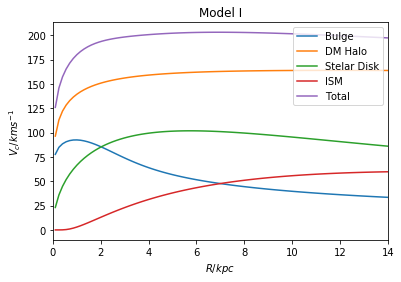

In [23]:
plt.plot(R,V_b,label='Bulge')
plt.plot(R,Vc_DM,label='DM Halo')
plt.plot(R,Vc_SD,label='Stelar Disk')
plt.plot(R,Vc_ISM,label='ISM')
plt.plot(R,Vc2_tot(R),label='Total')
xlim(0.,14.)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Model I')
plt.show()

In [21]:
def Vc2_tot(l):
    V2_b = 4.*np.pi*G*q_b*rho_b_II*Vc_ad_b(R)
    V2_DM = C_DM*G*rho_h_II*Vc2_DM(R)
    V2_SD_ = C_SD*Vc2_SD(R)
    V2_ISM = G*C_ISM*V_c_g_ISM(R)
    suma = V2_b + V2_DM + V2_SD_ + V2_ISM
    return np.sqrt(suma)

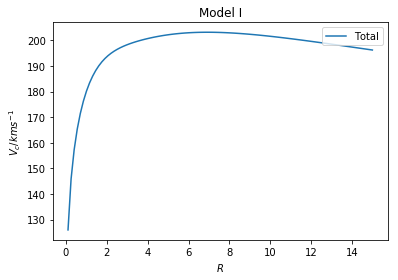

In [22]:
plt.plot(R,Vc2_tot(R),label='Total')
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Model I')
plt.show()